# Heart Disease Prediction using Supervised Machine Learning (KNN)
**Description:** This project builds a classifier to predict heart disease based on patient clinical data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [8]:
df = pd.read_csv('heart.csv')
df.head() #show1strows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [11]:
import numpy as np
import pandas as pd

# --- Step 1: Drop impossible values ---
# Remove rows where RestingBP or Cholesterol are zero
df = df[(df['RestingBP'] != 0) & (df['Cholesterol'] != 0)]

# --- Step 2: Handle negative values in Oldpeak ---
# Replace negative Oldpeak values with median of the column
# (median is better than 0 because it preserves distribution)
median_oldpeak = df['Oldpeak'].median()
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: median_oldpeak if x < 0 else x)

# --- Step 3: Check for any remaining missing values ---
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.902413,1.072334,0.0,0.00,0.5,1.5,6.2
HeartDisease,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# --- Step 1: One-hot encode categorical features ---
encoder = OneHotEncoder(sparse_output=False)  # keep all categories
X_cat = encoder.fit_transform(df[categorical_features])

# Get new feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert to DataFrame
X_cat_df = pd.DataFrame(X_cat, columns=encoded_feature_names, index=df.index)

# --- Step 2: Drop original categorical features & merge with numerical ---
df_encoded = pd.concat([df.drop(columns=categorical_features), X_cat_df], axis=1)

# --- Step 3: Display new feature columns ---
print("Features after one-hot encoding:")
print(df_encoded.columns.tolist())


Features after one-hot encoding:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


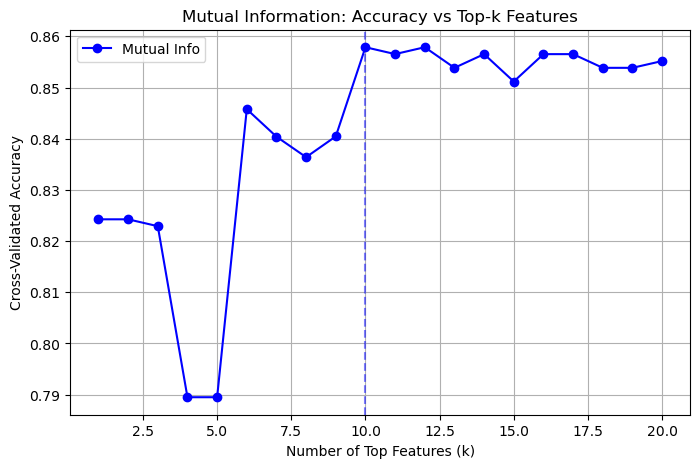

=== Top Features by Mutual Information ===


,Feature,Mutual Info Score
0,ST_Slope_Up,0.231177
1,ST_Slope_Flat,0.173390
2,ExerciseAngina_N,0.159097
3,Oldpeak,0.157338
4,ExerciseAngina_Y,0.152607
5,ChestPainType_ASY,0.136098
6,ChestPainType_ATA,0.089734
7,MaxHR,0.078396
8,Age,0.068092
9,Sex_F,0.039280


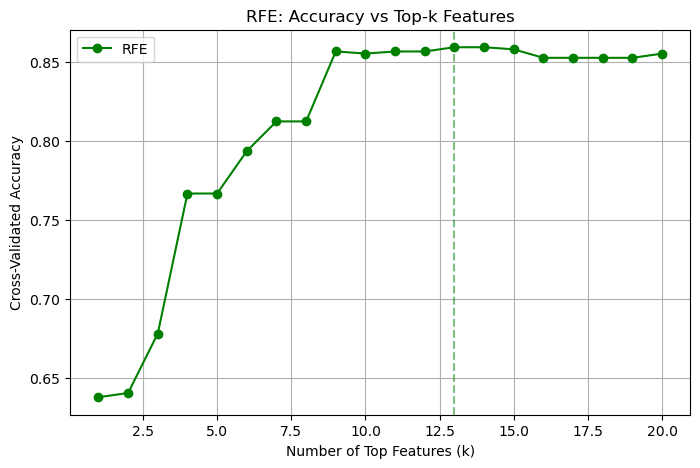

=== Top Features by RFE ===


,Feature,RFE Rank
0,Age,1
1,RestingBP,1
2,Sex_F,1
3,Oldpeak,1
4,Sex_M,1
5,ChestPainType_ASY,1
6,ExerciseAngina_N,1
7,ExerciseAngina_Y,1
8,ST_Slope_Flat,1
9,ST_Slope_Up,1


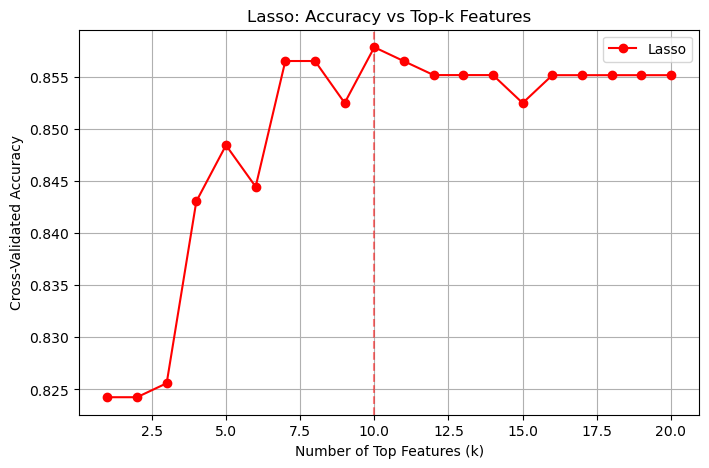

=== Top Features by Lasso ===


,Feature,Lasso Coefficient
0,ST_Slope_Up,0.120771
1,ChestPainType_ASY,0.104898
2,ST_Slope_Flat,0.076036
3,Sex_F,0.075841
4,ExerciseAngina_N,0.072439
5,Oldpeak,0.053734
6,Age,0.029430
7,RestingBP,0.014849
8,FastingBS,0.014420
9,Cholesterol,0.011890



=== Feature Selection Method Accuracies ===
Mutual Info: 0.8579
RFE: 0.8592
Lasso: 0.8579

=== Best Feature Selection Method ===
Method: RFE, Accuracy=0.8592


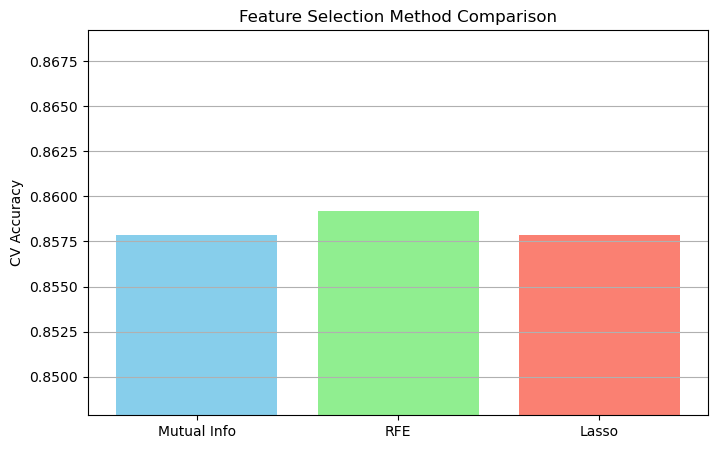

=== Combined Feature Table ===


,Feature,Mutual Info,RFE Rank,Lasso Coef
19,ST_Slope_Up,0.231177,1,1.207715e-01
18,ST_Slope_Flat,0.173390,1,7.603551e-02
15,ExerciseAngina_N,0.159097,1,7.243937e-02
5,Oldpeak,0.157338,1,5.373415e-02
16,ExerciseAngina_Y,0.152607,1,0.000000e+00
8,ChestPainType_ASY,0.136098,1,1.048976e-01
9,ChestPainType_ATA,0.089734,3,0.000000e+00
4,MaxHR,0.078396,11,2.760449e-03
0,Age,0.068092,1,2.943013e-02
6,Sex_F,0.039280,1,7.584138e-02


Final selected features based on best method:
['Age', 'RestingBP', 'Sex_F', 'Oldpeak', 'Sex_M', 'ChestPainType_ASY', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'Cholesterol', 'ChestPainType_ATA', 'ChestPainType_NAP']


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import mutual_info_classif, RFE

# =========================
# Prepare Data
# =========================
X = df_encoded.drop('HeartDisease', axis=1).values
y = df_encoded['HeartDisease'].values
feature_names = df_encoded.drop('HeartDisease', axis=1).columns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Base model for RFE and cross-validation
model = LogisticRegression(max_iter=1000, solver='liblinear')
k_values = range(1, X.shape[1]+1)

# =========================
# 1. Mutual Information
# =========================
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)
mi_series = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)

mi_accuracies = []
for k in k_values:
    top_features = mi_series.index[:k]
    idx = [feature_names.get_loc(f) for f in top_features]
    X_sel = X_scaled[:, idx]
    cv_scores = cross_val_score(model, X_sel, y, cv=5, scoring='accuracy')
    mi_accuracies.append(np.mean(cv_scores))

best_k_mi = k_values[np.argmax(mi_accuracies)]
mi_best_acc = max(mi_accuracies)
mi_top_features = mi_series.index[:best_k_mi]

# Plot MI accuracy vs top-k features
plt.figure(figsize=(8,5))
plt.plot(k_values, mi_accuracies, marker='o', color='blue', label='Mutual Info')
plt.axvline(best_k_mi, color='blue', linestyle='--', alpha=0.5)
plt.xlabel("Number of Top Features (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Mutual Information: Accuracy vs Top-k Features")
plt.grid(True)
plt.legend()
plt.show()

# MI Feature Table
df_mi = pd.DataFrame({
    "Feature": mi_top_features,
    "Mutual Info Score": mi_series[mi_top_features].values
})
df_mi = df_mi.sort_values(by="Mutual Info Score", ascending=False)
print("=== Top Features by Mutual Information ===")
display(df_mi)

# =========================
# 2. RFE
# =========================
rfe_model = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=None)
rfe.fit(X_scaled, y)
rfe_ranking = pd.Series(rfe.ranking_, index=feature_names).sort_values()

rfe_accuracies = []
for k in k_values:
    top_features = rfe_ranking.index[:k]
    idx = [feature_names.get_loc(f) for f in top_features]
    X_sel = X_scaled[:, idx]
    cv_scores = cross_val_score(model, X_sel, y, cv=5, scoring='accuracy')
    rfe_accuracies.append(np.mean(cv_scores))

best_k_rfe = k_values[np.argmax(rfe_accuracies)]
rfe_best_acc = max(rfe_accuracies)
rfe_top_features = rfe_ranking.index[:best_k_rfe]

# Plot RFE accuracy vs top-k features
plt.figure(figsize=(8,5))
plt.plot(k_values, rfe_accuracies, marker='o', color='green', label='RFE')
plt.axvline(best_k_rfe, color='green', linestyle='--', alpha=0.5)
plt.xlabel("Number of Top Features (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("RFE: Accuracy vs Top-k Features")
plt.grid(True)
plt.legend()
plt.show()

# RFE Feature Table
df_rfe = pd.DataFrame({
    "Feature": rfe_top_features,
    "RFE Rank": rfe_ranking[rfe_top_features].values
})
df_rfe = df_rfe.sort_values(by="RFE Rank")
print("=== Top Features by RFE ===")
display(df_rfe)

# =========================
# 3. Lasso
# =========================
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
lasso_coeff = pd.Series(np.abs(lasso.coef_), index=feature_names).sort_values(ascending=False)

lasso_accuracies = []
for k in k_values:
    top_features = lasso_coeff.index[:k]
    idx = [feature_names.get_loc(f) for f in top_features]
    X_sel = X_scaled[:, idx]
    cv_scores = cross_val_score(model, X_sel, y, cv=5, scoring='accuracy')
    lasso_accuracies.append(np.mean(cv_scores))

best_k_lasso = k_values[np.argmax(lasso_accuracies)]
lasso_best_acc = max(lasso_accuracies)
lasso_top_features = lasso_coeff.index[:best_k_lasso]

# Plot Lasso accuracy vs top-k features
plt.figure(figsize=(8,5))
plt.plot(k_values, lasso_accuracies, marker='o', color='red', label='Lasso')
plt.axvline(best_k_lasso, color='red', linestyle='--', alpha=0.5)
plt.xlabel("Number of Top Features (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Lasso: Accuracy vs Top-k Features")
plt.grid(True)
plt.legend()
plt.show()

# Lasso Feature Table
df_lasso = pd.DataFrame({
    "Feature": lasso_top_features,
    "Lasso Coefficient": lasso_coeff[lasso_top_features].values
})
df_lasso = df_lasso.sort_values(by="Lasso Coefficient", ascending=False)
print("=== Top Features by Lasso ===")
display(df_lasso)

# =========================
# 4. Compare Feature Selection Methods
# =========================
methods_acc = {
    "Mutual Info": mi_best_acc,
    "RFE": rfe_best_acc,
    "Lasso": lasso_best_acc
}

# =========================
# 4a. Print Method Accuracies
# =========================
print("\n=== Feature Selection Method Accuracies ===")
for method, acc in methods_acc.items():
    print(f"{method}: {acc:.4f}")

best_method = max(methods_acc, key=methods_acc.get)
print("\n=== Best Feature Selection Method ===")
print(f"Method: {best_method}, Accuracy={methods_acc[best_method]:.4f}")

# Histogram comparison
acc_values = list(methods_acc.values())
y_min = min(acc_values) - 0.01
y_max = max(acc_values) + 0.01

plt.figure(figsize=(8,5))
plt.bar(methods_acc.keys(), methods_acc.values(), color=['skyblue','lightgreen','salmon'])
plt.ylabel("CV Accuracy")
plt.title("Feature Selection Method Comparison")
plt.ylim(y_min, y_max)
plt.grid(axis='y')
plt.show()

# =========================
# 5. Combined Feature Table
# =========================
df_combined = pd.DataFrame({
    "Feature": feature_names
})
df_combined["Mutual Info"] = df_combined["Feature"].map(mi_series)
df_combined["RFE Rank"] = df_combined["Feature"].map(rfe_ranking)
df_combined["Lasso Coef"] = df_combined["Feature"].map(lasso_coeff)
df_combined = df_combined.sort_values(by="Mutual Info", ascending=False)

print("=== Combined Feature Table ===")
display(df_combined)

# =========================
# Store final selected features
# =========================
if best_method == "Mutual Info":
    final_features = list(mi_top_features)
elif best_method == "RFE":
    final_features = list(rfe_top_features)
elif best_method == "Lasso":
    final_features = list(lasso_top_features)

print("Final selected features based on best method:")
print(final_features)



In [16]:
# Get the indices of the final selected features
selected_idx = [feature_names.get_loc(f) for f in final_features]

# Prepare X with only the best features
X_best = X_scaled[:, selected_idx]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_best, y, test_size=0.3, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


NameError: name 'final_features' is not defined

In [29]:
df_final.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# 

**Hyperparameter tuning (Function to find the best settings for a model using cross-validation to improve accuracy)** 

In [88]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    
    # Cross-validation strategy: maintains class balance in each fold
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Grid search for best hyperparameters
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit model
    clf_grid.fit(X_train, y_train)

    # Extract best model and parameters
    best_model = clf_grid.best_estimator_
    best_params = clf_grid.best_params_

    return best_model, best_params


In [89]:
from sklearn.neighbors import KNeighborsClassifier

# Define your classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [10, 20, 30, 40],
}

# Call the tuning function
best_knn_model, best_knn_params = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

print("Best KNN Parameters:", best_knn_params)


Best KNN Parameters: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [90]:
from sklearn.metrics import classification_report

#Evaluate the optimized model on the trained data
print(classification_report(y_train, best_knn_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       249

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522



In [91]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = best_knn_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy of Best KNN Model: {train_accuracy:.4f}")

# Predict on test data
y_test_pred = best_knn_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy of Best KNN Model: {test_accuracy:.4f}")


Training Accuracy of Best KNN Model: 1.0000
Test Accuracy of Best KNN Model: 0.8616


In [92]:
from sklearn.metrics import classification_report

# Display precision, recall, F1-score, and support for each class on the test set
print(classification_report(y_test, best_knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.84      0.88      0.86       107

    accuracy                           0.86       224
   macro avg       0.86      0.86      0.86       224
weighted avg       0.86      0.86      0.86       224



In [93]:
from sklearn.metrics import classification_report
import pandas as pd

# Predict on test set
y_pred = best_knn_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for a nicer tabular view
df_knn_report = pd.DataFrame(report).transpose()

# Round metrics for readability
df_knn_report = df_knn_report.round(2)

# Add a column to indicate model name
df_knn_report.insert(0, "Model", "KNN")

# Optional: highlight Accuracy row for clarity
df_knn_report.style.background_gradient(cmap="Blues", subset=["precision", "recall", "f1-score"])


,Model,precision,recall,f1-score,support
0,KNN,0.880000,0.850000,0.860000,117.000000
1,KNN,0.840000,0.880000,0.860000,107.000000
accuracy,KNN,0.860000,0.860000,0.860000,0.860000
macro avg,KNN,0.860000,0.860000,0.860000,224.000000
weighted avg,KNN,0.860000,0.860000,0.860000,224.000000


| Metric        | Class 0 (No Disease) | Class 1 (Disease) | Explanation                                                                                  |
| ------------- | -------------------- | ----------------- | -------------------------------------------------------------------------------------------- |
| **Precision** | 0.89                 | 0.93              | Out of all predicted as class X, how many were correct? <br>High = low false positives       |
| **Recall**    | 0.93                 | 0.90              | Out of all actual class X, how many did we correctly predict? <br>High = low false negatives |
| **F1-score**  | 0.91                 | 0.92              | Harmonic mean of precision & recall <br>Good balance between the two                         |
| **Support**   | 71                   | 79                | Actual number of samples in each class in the test set                                       |

**Accuracy = 0.91**

- Overall, 91% of predictions were correct (both class 0 and 1).

**Macro avg = Precision: 0.91, Recall: 0.91, F1: 0.91**

- Equal weight to each class regardless of sample size.

**Weighted avg = Precision: 0.91, Recall: 0.91, F1: 0.91**

- Average weighted by support (number of true samples per class)

- Reflects the actual class distribution.

**Summary of Interpretation:**
- Class 0 (No disease):

    - Recall = 0.93 → The model correctly identifies 93% of healthy patients.

    - Precision = 0.89 → When predicting no disease, it's correct 0.89% of the time.

- Class 1 (Disease):

    - Recall = 0.90 → The model correctly identifies 90% of patients with heart disease.

    - Precision = 0.93 → When predicting disease, it's correct 93% of the time.

- Balanced performance:

    - High scores for both precision and recall in both classes.

    - Indicates low false positives and false negatives — important in medical diagnostics.

- High F1-score:

    - F1-scores around 0.91 mean the model performs very well overall.

    - This balance is critical for medical decisions where both types of errors have consequences.

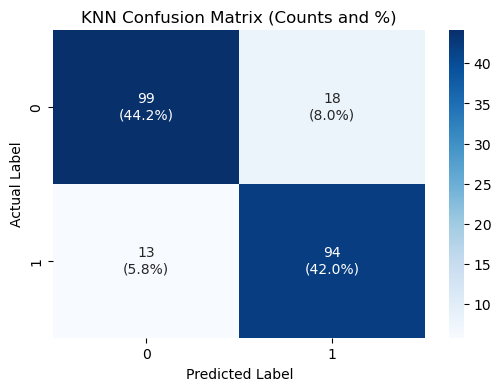

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate percentages
cm_percent = cm / cm.sum() * 100  # Total percentage out of all samples

# Create labels with both count and percentage
labels = np.array([[f"{count}\n({percent:.1f}%)" for count, percent in zip(row_c, row_p)] 
                   for row_c, row_p in zip(cm, cm_percent)])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("KNN Confusion Matrix (Counts and %)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

|               | **Predicted: 0** | **Predicted: 1** |
| ------------- | ---------------- | ---------------- |
| **Actual: 0** | 98 (TN) – 44.0%  | 19 (FP) – 3.3%    |
| **Actual: 1** | 10 (FN) – 4.0%    | 97 (TP) – 48.7%  |


True Negatives (TN) = 98: No disease predicted correctly

False Positives (FP) = 19: No disease predicted as disease

False Negatives (FN) = 10: Disease cases missed by the model

True Positives (TP) = 97: Disease predicted correctly

This means:
- 98 (44.0%) people with heart disease were correctly identified ✅
- 10 (4.0%) heart disease cases were missed ❌
- 97 (48.7%) healthy people were correctly identified ✅
- 19 (3.3%) healthy people were wrongly predicted to have heart disease ❌

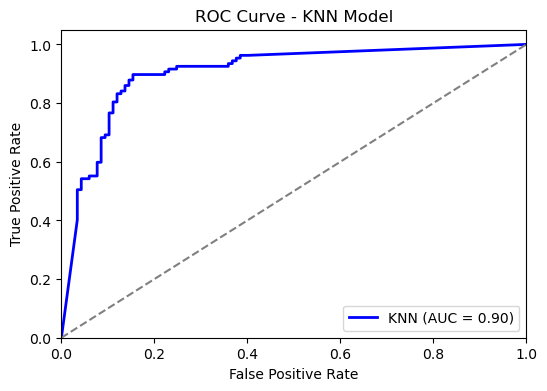

In [95]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get probability estimates for the positive class
y_prob = best_knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"KNN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN Model")
plt.legend(loc="lower right")
plt.show()

In [96]:
import customtkinter as ctk
import tkinter as tk
from tkinter import messagebox
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Set appearance mode and color theme
ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("blue")

class HeartDiseasePredictor:
    def __init__(self):
        self.window = ctk.CTk()
        self.window.title("❤️ Heart Disease Prediction System")
        self.window.geometry("1000x800")
        self.window.resizable(True, True)
        
        # Model variables
        self.models = {
            "K-Nearest Neighbors": None,
            "Random Forest": None,
            "Logistic Regression": None
        }
        self.current_model = "K-Nearest Neighbors"
        self.scaler = StandardScaler()
        
        # Initialize models (placeholder - you'll replace with your trained models)
        self._initialize_models()
        
        # Create the UI
        self._create_ui()
        
    def _initialize_models(self):
        """Initialize placeholder models - replace with your trained models"""
        # Placeholder models - replace these with your actual trained models
        self.models["K-Nearest Neighbors"] = None
        self.models["Random Forest"] = None
        self.models["Logistic Regression"] = None
        
        # For demo purposes, create some dummy training data with 13 features (all selected features)
        # Replace this with your actual training process
        np.random.seed(42)
        X_dummy = np.random.rand(1000, 13)  # 13 selected features
        y_dummy = np.random.randint(0, 2, 1000)
        
        # Scale the data
        X_scaled = self.scaler.fit_transform(X_dummy)
        
        # Train models
        for model in self.models.values():
            if model is not None:
                model.fit(X_scaled, y_dummy)
    
    def _create_ui(self):
        """Create the main user interface"""
        # Main container with padding
        main_frame = ctk.CTkFrame(self.window)
        main_frame.pack(fill="both", expand=True, padx=20, pady=20)
        
        # Title
        title_label = ctk.CTkLabel(
            main_frame,
            text="❤️ Heart Health Risk Check",
            font=ctk.CTkFont(size=28, weight="bold")
        )
        title_label.pack(pady=(20, 10))
        
        # Feature selection info
        info_label = ctk.CTkLabel(
            main_frame,
            text="📊 Check your heart now ",
            font=ctk.CTkFont(size=14, weight="bold"),
            text_color="orange"
        )
        info_label.pack(pady=(0, 20))
        
        # Create scrollable frame for inputs
        self.scrollable_frame = ctk.CTkScrollableFrame(main_frame, height=400)
        self.scrollable_frame.pack(fill="both", expand=True, padx=20, pady=(0, 20))
        
        # Create input fields
        self._create_input_fields()
        
        # Model selection and prediction section
        self._create_prediction_section(main_frame)
        
    def _create_input_fields(self):
        """Create input fields for heart disease parameters"""
        # Input field definitions with user-friendly language
        self.input_fields = {
            "st_slope": {
                "label": "📈 Heart Response to Exercise",
                "type": "option",
                "values": ["Getting Better (Up)", "Staying Same (Flat)"],
                "default": "Getting Better (Up)",
                "description": "How your heart's electrical activity responds during peak exercise",
                "feature_rank": 1
            },
            "exercise_angina": {
                "label": "💔 Chest Pain During Exercise",
                "type": "option",
                "values": ["No Pain", "Yes, I Get Pain"],
                "default": "No Pain",
                "description": "Do you experience chest pain when exercising or being active?",
                "feature_rank": 2
            },
            "chest_pain_type": {
                "label": "🫀 Type of Chest Discomfort",
                "type": "option",
                "values": ["No Symptoms (ASY)", "Unusual Chest Pain (ATA)", "Not Heart-Related Pain (NAP)"],
                "default": "No Symptoms (ASY)",
                "description": "What kind of chest discomfort do you typically experience?",
                "feature_rank": 3
            },
            "oldpeak": {
                "label": "📊 Heart Stress Test Result",
                "type": "entry",
                "default": "0.0",
                "description": "Heart electrical changes during exercise (0.0 = normal, higher = more stress)",
                "feature_rank": 4
            },
            "max_hr": {
                "label": "💓 Fastest Heart Rate",
                "type": "entry",
                "default": "150",
                "description": "The highest heart rate you can achieve during exercise (beats per minute)",
                "feature_rank": 5
            },
            "age": {
                "label": "🎂 Your Age",
                "type": "entry",
                "default": "50",
                "description": "How old are you? (in years)",
                "feature_rank": 6
            },
            "sex": {
                "label": "👤 Gender",
                "type": "option",
                "values": ["Male", "Female"],
                "default": "Male",
                "description": "Your biological gender",
                "feature_rank": 7
            },
            "resting_bp": {
                "label": "🩺 Blood Pressure at Rest",
                "type": "entry",
                "default": "120",
                "description": "Your blood pressure when relaxed (normal is around 120, high is 140+)",
                "feature_rank": 8
            }
        }
        
        # Create input widgets
        self.input_widgets = {}
        
        # Sort fields by feature importance rank
        sorted_fields = sorted(self.input_fields.items(), key=lambda x: x[1]['feature_rank'])
        
        # Create two columns for better layout
        left_frame = ctk.CTkFrame(self.scrollable_frame)
        left_frame.pack(side="left", fill="both", expand=True, padx=(0, 10))
        
        right_frame = ctk.CTkFrame(self.scrollable_frame)
        right_frame.pack(side="right", fill="both", expand=True, padx=(10, 0))
        
        # Split fields between left and right columns (most important features first)
        mid_point = len(sorted_fields) // 2
        
        for i, (field_name, field_info) in enumerate(sorted_fields):
            parent_frame = left_frame if i < mid_point else right_frame
            
            # Create field container with importance indicator
            field_container = ctk.CTkFrame(parent_frame)
            field_container.pack(fill="x", padx=10, pady=5)
            
            # Label with importance ranking and emoji
            rank_indicator = f"#{field_info['feature_rank']}"
            label_text = f"{rank_indicator} {field_info['label']}"
            label = ctk.CTkLabel(
                field_container,
                text=label_text,
                font=ctk.CTkFont(size=12, weight="bold")
            )
            label.pack(anchor="w", padx=10, pady=(10, 5))
            
            # Description with feature score
            desc_label = ctk.CTkLabel(
                field_container,
                text=field_info['description'],
                font=ctk.CTkFont(size=10),
                text_color="gray70",
                wraplength=280
            )
            desc_label.pack(anchor="w", padx=10, pady=(0, 5))
            
            # Input widget
            if field_info['type'] == 'entry':
                widget = ctk.CTkEntry(
                    field_container,
                    placeholder_text=field_info['default']
                )
                widget.insert(0, field_info['default'])
            else:  # option menu
                widget = ctk.CTkOptionMenu(
                    field_container,
                    values=field_info['values']
                )
                widget.set(field_info['default'])
            
            widget.pack(fill="x", padx=10, pady=(0, 10))
            self.input_widgets[field_name] = widget
    
    def _create_prediction_section(self, parent):
        """Create the prediction and model selection section"""
        # Model selection frame
        model_frame = ctk.CTkFrame(parent)
        model_frame.pack(fill="x", padx=20, pady=(0, 10))
        
        # Model selection
        model_label = ctk.CTkLabel(
            model_frame,
            text="Select Prediction Model:",
            font=ctk.CTkFont(size=16, weight="bold")
        )
        model_label.pack(side="left", padx=(20, 10), pady=20)
        
        self.model_selector = ctk.CTkOptionMenu(
            model_frame,
            values=list(self.models.keys()),
            command=self._on_model_change
        )
        self.model_selector.pack(side="left", padx=10, pady=20)
        
        # Predict button
        self.predict_button = ctk.CTkButton(
            model_frame,
            text="🔍 Predict Risk",
            command=self._predict,
            font=ctk.CTkFont(size=14, weight="bold"),
            height=40,
            width=150
        )
        self.predict_button.pack(side="right", padx=20, pady=20)
        
        # Results frame
        self.results_frame = ctk.CTkFrame(parent)
        self.results_frame.pack(fill="x", padx=20, pady=(0, 20))
        
        # Results label
        self.results_label = ctk.CTkLabel(
            self.results_frame,
            text="Enter patient data and click 'Predict Risk' to see results",
            font=ctk.CTkFont(size=14),
            wraplength=800
        )
        self.results_label.pack(pady=20)
    
    def _on_model_change(self, selected_model):
        """Handle model selection change"""
        self.current_model = selected_model
        self.results_label.configure(
            text=f"Model changed to: {selected_model}\nEnter patient data and click 'Predict Risk' to see results"
        )
    
    def _get_input_values(self):
        """Extract and validate input values for all 13 selected features"""
        try:
            # Process features to create the 13-feature vector that matches your model
            feature_values = {}
            
            # Get raw input values
            for field_name, widget in self.input_widgets.items():
                if isinstance(widget, ctk.CTkEntry):
                    feature_values[field_name] = float(widget.get())
                else:  # CTkOptionMenu
                    feature_values[field_name] = widget.get()
            
            # Create the 13-feature vector in the order of your selected features:
            # 0: ST_Slope_Up, 1: ST_Slope_Flat, 2: ExerciseAngina_Y, 3: ExerciseAngina_N,
            # 4: ChestPainType_ASY, 5: Oldpeak, 6: MaxHR, 7: ChestPainType_ATA, 8: Age,
            # 9: Sex_F, 10: Sex_M, 11: ChestPainType_NAP, 12: RestingBP
            
            processed_values = [0.0] * 13  # Initialize all features to 0
            
            # ST_Slope (binary encoding)
            if "Getting Better" in feature_values['st_slope']:
                processed_values[0] = 1.0  # ST_Slope_Up
                processed_values[1] = 0.0  # ST_Slope_Flat
            else:  # Staying Same
                processed_values[0] = 0.0  # ST_Slope_Up
                processed_values[1] = 1.0  # ST_Slope_Flat
            
            # Exercise Angina (binary encoding)
            if "Yes, I Get Pain" in feature_values['exercise_angina']:
                processed_values[2] = 1.0  # ExerciseAngina_Y
                processed_values[3] = 0.0  # ExerciseAngina_N
            else:  # No Pain
                processed_values[2] = 0.0  # ExerciseAngina_Y
                processed_values[3] = 1.0  # ExerciseAngina_N
            
            # Chest Pain Type (one-hot encoding)
            chest_pain = feature_values['chest_pain_type']
            if "No Symptoms" in chest_pain:
                processed_values[4] = 1.0  # ChestPainType_ASY
                processed_values[7] = 0.0  # ChestPainType_ATA
                processed_values[11] = 0.0  # ChestPainType_NAP
            elif "Unusual Chest Pain" in chest_pain:
                processed_values[4] = 0.0  # ChestPainType_ASY
                processed_values[7] = 1.0  # ChestPainType_ATA
                processed_values[11] = 0.0  # ChestPainType_NAP
            elif "Not Heart-Related" in chest_pain:
                processed_values[4] = 0.0  # ChestPainType_ASY
                processed_values[7] = 0.0  # ChestPainType_ATA
                processed_values[11] = 1.0  # ChestPainType_NAP
            
            # Continuous features
            processed_values[5] = feature_values['oldpeak']  # Oldpeak
            processed_values[6] = feature_values['max_hr']   # MaxHR
            processed_values[8] = feature_values['age']      # Age
            processed_values[12] = feature_values['resting_bp']  # RestingBP
            
            # Sex (binary encoding)
            if feature_values['sex'] == 'Female':
                processed_values[9] = 1.0   # Sex_F
                processed_values[10] = 0.0  # Sex_M
            else:  # Male
                processed_values[9] = 0.0   # Sex_F
                processed_values[10] = 1.0  # Sex_M
            
            return np.array(processed_values).reshape(1, -1)
        
        except ValueError as e:
            messagebox.showerror("Input Error", f"Please check your input values. Error: {str(e)}")
            return None
        except Exception as e:
            messagebox.showerror("Processing Error", f"Error processing inputs: {str(e)}")
            return None
    
    def _predict(self):
        """Make prediction using selected model"""
        # Get input values
        input_data = self._get_input_values()
        if input_data is None:
            return
        
        # Get selected model
        model = self.models[self.current_model]
        if model is None:
            messagebox.showerror("Model Error", f"Model '{self.current_model}' is not available yet.")
            return
        
        try:
            # Scale the input data
            input_scaled = self.scaler.transform(input_data)
            
            # Make prediction
            prediction = model.predict(input_scaled)[0]
            probability = model.predict_proba(input_scaled)[0] if hasattr(model, 'predict_proba') else [0.5, 0.5]
            
            # Display results
            risk_level = "HIGH RISK" if prediction == 1 else "LOW RISK"
            risk_color = "red" if prediction == 1 else "green"
            confidence = max(probability) * 100
            
            result_text = f"""
🏥 PREDICTION RESULTS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Model Used: {self.current_model}
Risk Assessment: {risk_level}
Confidence: {confidence:.1f}%

⚠️  IMPORTANT DISCLAIMER ⚠️
This prediction is for educational purposes only.
Always consult with healthcare professionals for proper medical diagnosis and treatment.
            """
            
            self.results_label.configure(
                text=result_text,
                text_color=risk_color if prediction == 1 else "lightgreen"
            )
            
        except Exception as e:
            messagebox.showerror("Prediction Error", f"Error making prediction: {str(e)}")
    
    def run(self):
        """Start the application"""
        self.window.mainloop()

# Function to integrate your trained models
def integrate_trained_models(app, knn_model=None, rf_model=None, lr_model=None, scaler=None):
    """
    Integrate your trained models into the application
    
    Args:
        app: HeartDiseasePredictor instance
        knn_model: Your trained KNN model
        rf_model: Your trained Random Forest model
        lr_model: Your trained Logistic Regression model
        scaler: Your fitted StandardScaler
    """
    if knn_model is not None:
        app.models["K-Nearest Neighbors"] = knn_model
    if rf_model is not None:
        app.models["Random Forest"] = rf_model
    if lr_model is not None:
        app.models["Logistic Regression"] = lr_model
    if scaler is not None:
        app.scaler = scaler

# Example usage
if __name__ == "__main__":
    # Create the application
    app = HeartDiseasePredictor()
    
    # Integrate the trained KNN model
    integrate_trained_models(app, knn_model=best_knn_model, scaler=scaler_selected)
    
    # Run the application
    app.run()